Importing the required libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import warnings
from scipy.stats import variation

%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")
import sklearn
from sklearn.metrics import mean_squared_error

Read the dataset from excel

In [21]:
mydata =pd.read_excel("global_superstore.xlsx")

Fetching the top five data from the dataset

In [22]:
mydata.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.77,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


Getting the total rows and colums from the dataset

In [23]:
mydata.shape

(51290, 24)

Checking the columns-wise information of the dataset

In [24]:
mydata.info

<bound method DataFrame.info of        Row ID                  Order ID Order Date  Ship Date       Ship Mode  \
0       40098  CA-2014-AB10015140-41954 2014-11-11 2014-11-13     First Class   
1       26341    IN-2014-JR162107-41675 2014-02-05 2014-02-07    Second Class   
2       25330    IN-2014-CR127307-41929 2014-10-17 2014-10-18     First Class   
3       13524   ES-2014-KM1637548-41667 2014-01-28 2014-01-30     First Class   
4       47221   SG-2014-RH9495111-41948 2014-11-05 2014-11-06        Same Day   
...       ...                       ...        ...        ...             ...   
51285   29002   IN-2015-KE1642066-42174 2015-06-19 2015-06-19        Same Day   
51286   34337  US-2014-ZD21925140-41765 2014-05-06 2014-05-10  Standard Class   
51287   31315  CA-2012-ZD21925140-41147 2012-08-26 2012-08-31    Second Class   
51288    9596   MX-2013-RB1979518-41322 2013-02-17 2013-02-21  Standard Class   
51289    6147   MX-2013-MC1810093-41416 2013-05-22 2013-05-26    Second Class

Getting the summary of the numeric columns

In [25]:
mydata.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.478567
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.251373
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,1.002000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


Cheking the tatal numbers of the null values

In [28]:
mydata.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
Postal Code       41296
City                  0
State                 0
Country               0
Region                0
Market                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

Checking all the columns name of the dataset

In [29]:
mydata.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Postal Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

# Outliers

Checking boxplot for 'Profit'

<AxesSubplot:xlabel='Profit'>

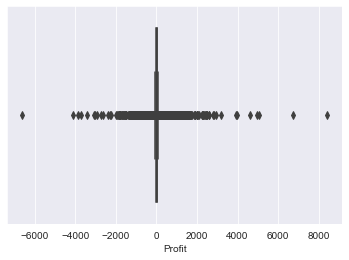

In [31]:
sns.boxplot(mydata['Profit'])

Checking outlier for 'Sales'

<AxesSubplot:xlabel='Sales'>

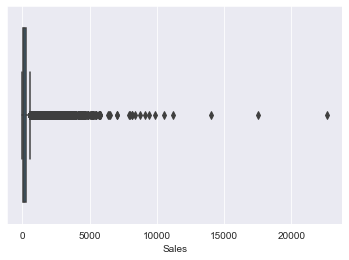

In [32]:
sns.boxplot(mydata['Sales'])

# Univariate Analysis

Showing the pie plot of 'Segment' column

<AxesSubplot:ylabel='Segment'>

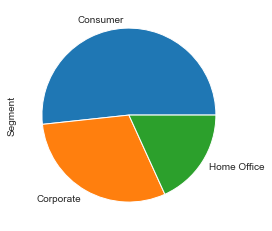

In [47]:
mydata['Segment'].value_counts(normalize = False).plot.pie()

Showing the bar plot of 'Market' column

<AxesSubplot:>

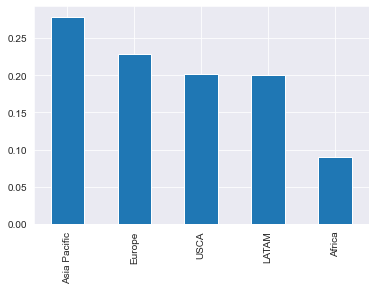

In [49]:
mydata['Market'].value_counts(normalize = True).plot.bar()

# Multivariate

<AxesSubplot:xlabel='Segment'>

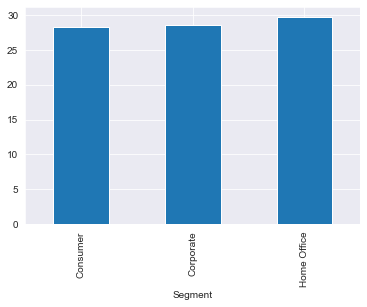

In [50]:
mydata.groupby('Segment')['Profit'].mean().plot.bar()

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

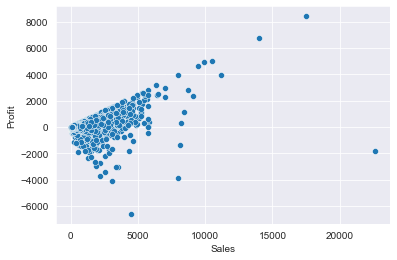

In [54]:
sns.scatterplot(mydata['Sales'],mydata['Profit'])

<AxesSubplot:xlabel='Market'>

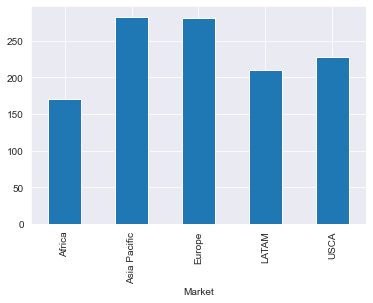

In [51]:
mydata.groupby('Market')['Sales'].mean().plot.bar()

<AxesSubplot:xlabel='Market', ylabel='Sales'>

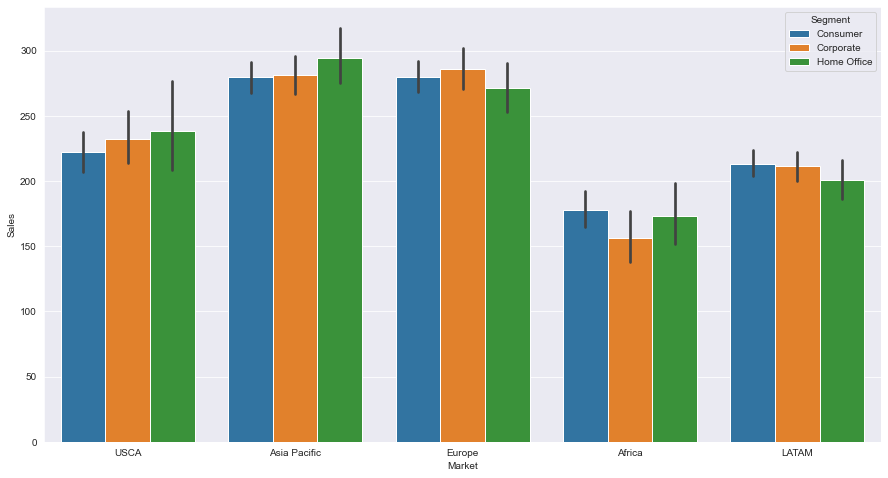

In [52]:
plt.figure(figsize=(15,8))
sns.barplot(data =mydata, x='Market',y='Sales',hue='Segment')